<a href="https://colab.research.google.com/github/adarshnitt/Deep-Learning/blob/main/Potatao_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> **Potatao Disease Classification- a Kaggle task** </h1>
Dataset: muhammadardiputra/potato-leaf-disease-dataset | Kaggle

<h3>Data Loading </h3>

In [1]:
# we will use data from Kaggle, so fist match colab and Kaggle
! pip install -q kaggle  # q : quit no verbose 

In [2]:
# downloading token from kaggle and saving in local computer then importing at new dir (~/.kaggle)
# path for token: Kaggle=>Account=>API_Token
from google.colab import files
files.upload()
# data will go to content section firstly

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adarshnitt","key":"6d32d5af10db0f45742b74aaa798b5e9"}'}

In [3]:
# imported data from kaggle to g-cloud in directory ~/.kaggle
! mkdir ~/.kaggle  # ~ home dir

In [4]:
# moving file kaggle.json to our new dir(~/.kagle)
# Ensure kaggle.json is in the location ~/.kaggle/kaggle.json to use the API.
! cp kaggle.json ~/.kaggle/

In [5]:
# lets see how many datasets are freely available in kaggle
! kaggle datasets list # getting info about all datasets.

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-12 11:59:54          18356  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          11035  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           5616  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3913  
nickuzmenkov/nih-chest-xrays-tfrecords                      NIH Chest X-rays

In [6]:
# securing our kaggle api 
! chmod 600 ~/.kaggle/kaggle.json
#  chmos to 600 means only owner can read and write access of directory ~/.kaggle/kaggale.json.

In [7]:
# m-1 to attach data in our newly built directory 
! kaggle competion download -c kaggle datasets download -d muhammadardiputra/potato-leaf-disease-dataset
# Your Kaggle API key is readable by other users on this system! To fix this, you can run 'chmod 600 /root/.kaggle/kaggle.json'
#  chmos to 600 means only owner can read and write access of directory ~/.kaggle/kaggale.json.

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: argument command: invalid choice: 'competion' (choose from 'competitions', 'c', 'datasets', 'd', 'kernels', 'k', 'config')


In [8]:
# downloading data at content/our_data
! kaggle datasets download -d muhammadardiputra/potato-leaf-disease-dataset
# -d is same as -v(verbosity)

 91% 23.0M/25.2M [00:00<00:00, 105MB/s] 
100% 25.2M/25.2M [00:00<00:00, 100MB/s]


In [9]:
# importing libraries
import pandas as pd
import numpy as np

In [10]:
# unzipping zip data file
! unzip "/content/potato-leaf-disease-dataset.zip"

Archive:  /content/potato-leaf-disease-dataset.zip
  inflating: Potato/Test/Potato___Early_blight/034959c1-f1e8-4a79-a6d5-3c1d14efa2f3___RS_Early.B 7136.JPG  
  inflating: Potato/Test/Potato___Early_blight/042135e2-e126-4900-9212-d42d900b8125___RS_Early.B 8791.JPG  
  inflating: Potato/Test/Potato___Early_blight/0604174e-3018-4faa-9975-0be32d2c0789___RS_Early.B 7123.JPG  
  inflating: Potato/Test/Potato___Early_blight/07953ca1-8935-449f-b338-4357ed683b2d___RS_Early.B 6815.JPG  
  inflating: Potato/Test/Potato___Early_blight/08029ccc-387e-4be6-9389-04f7b82fdb2a___RS_Early.B 9130.JPG  
  inflating: Potato/Test/Potato___Early_blight/08194ca3-f0b2-4aaa-8df8-5ec5ddc6696a___RS_Early.B 8151.JPG  
  inflating: Potato/Test/Potato___Early_blight/08392b44-ecc6-4f38-8566-361b552cfe21___RS_Early.B 7393.JPG  
  inflating: Potato/Test/Potato___Early_blight/107827b3-faa5-457c-97fd-3e34d2657f6b___RS_Early.B 7162.JPG  
  inflating: Potato/Test/Potato___Early_blight/109730cd-03f3-4139-a464-5f9151483e8c__

In [11]:
import pandas as pd
import numpy as np
#! pip install  tensorflow-gpu
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [12]:
# listing dir in test data
os.listdir("/content/Potato/Test") 

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [13]:
# no of images in each dir of test data
def info(d1):
  for samp in os.listdir(d1):
    subsamp=os.path.join(d1,samp)
    l=len(os.listdir(subsamp))
    print(l, " and samp type is -",samp,"***",d1[-5:])
  pass

In [14]:
info("/content/Potato/Valid")

100  and samp type is - Potato___Early_blight *** Valid
100  and samp type is - Potato___Late_blight *** Valid
100  and samp type is - Potato___healthy *** Valid


In [15]:
info("/content/Potato/Train")

300  and samp type is - Potato___Early_blight *** Train
300  and samp type is - Potato___Late_blight *** Train
300  and samp type is - Potato___healthy *** Train


In [16]:
# practice notes
"""
import os
import shutil
shutil.rmtree("/content/Potato/Train/new_train")
os.mkdir()
os.rmdir()
# to move a dqata from one folder to anothwr
os.listdir("")
os.path.join(a,b) : give a returned path
random.choice(): choose randomly any one from given data.
"""

'\nimport os\nimport shutil\nshutil.rmtree("/content/Potato/Train/new_train")\nos.mkdir()\nos.rmdir()\n# to move a dqata from one folder to anothwr\nos.listdir("")\nos.path.join(a,b) : give a returned path\nrandom.choice(): choose randomly any one from given data.\n'

<h1> Preprocessing </h1>


In [17]:
# real time image augmentation: scaling, shearing,rotaion etc
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def augment_train(path):
  "for train image"
  model=ImageDataGenerator(rotation_range=360,
                           shear_range=10, # angular ration float
                           zoom_range=0.3, # % zoom augmentation
                           rescale=1/255,  # rescaling (0-1)
                           horizontal_flip=True,
                           vertical_flip=True)
  # generating batches of augmenting data
  image=model.flow_from_directory(path,
                                  target_size=(224,224), # output augmented image shape 
                                  class_mode="binary",
                                  batch_size=20)
  return image

In [18]:
# first read image then show image. Dont go directly to show image.
def show(dir,index):
  comp=os.listdir(dir)
  new=os.path.join(dir,comp[index])
  data=os.listdir(new)
  print(len(data))
  plt.subplots(3,3,figsize=(8,8))
  for i in range(len(data)):
    plt.subplot(3,3,i+1)
    p3=os.path.join(new,data[i])
    i1=plt.imread(p3)
    plt.imshow(i1)
    if i >=8:
      break
  pass  

100


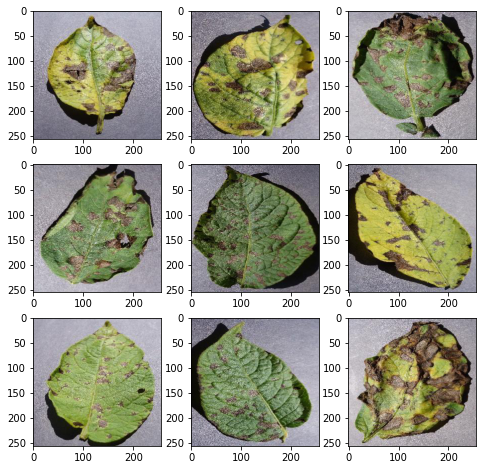

In [19]:
# testing infected photos
show("/content/Potato/Test",0)

100


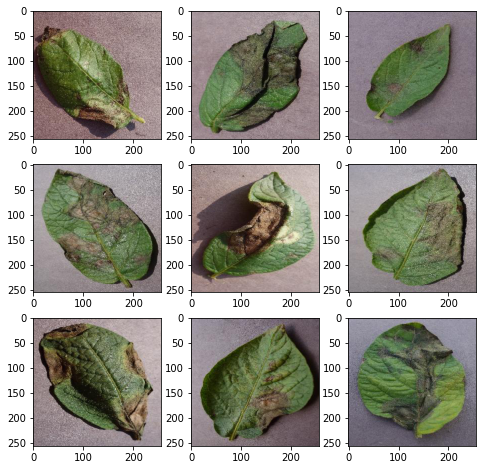

In [20]:
# testing late blight photos
show("/content/Potato/Valid",1)

In [21]:
def augment_val(path):
  " for validation data"
  model=ImageDataGenerator(rescale=1/255)
  img=model.flow_from_directory(directory=path,
                                target_size=(224,224),
                                batch_size=20,
                                class_mode="binary")
  return img

100


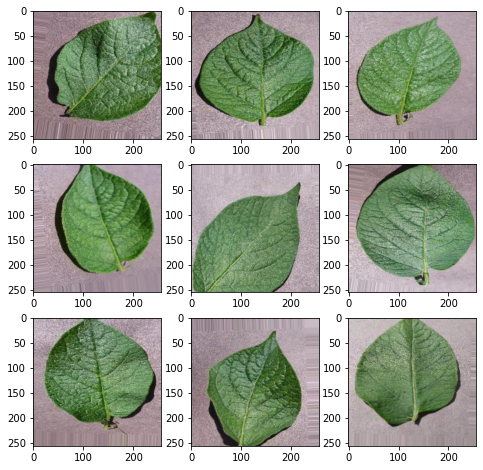

In [22]:
# testing healthy photos
show("/content/Potato/Valid",2)

In [23]:
data_train_augment=augment_train("/content/Potato/Train")
data_val_augment=augment_val("/content/Potato/Valid")

Found 900 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [24]:
from tensorflow.keras import layers,models
from keras import Sequential

<h1> Model Building</h1>

In [25]:
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array

<h1> CNN</h1>

In [26]:
model=Sequential()
# input shape is x then output will be ((x-f+2p)/s)+1.
# input data in CNN (Batch_size_Count, red,gren,blue) i.e (None,224,224,3) or (100,224,224,3)
model.add(Conv2D(filters=16,  #  16 specific feature based filters
                 kernel_size=(2,2), # filter size
                 activation="relu",
                 padding="same",  # final size will same as input
                 input_shape=(224,224,3)))  # input image shape
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 activation="relu"))
model.add(MaxPool2D(pool_size=(2,2))) # overfitting avoid use maxpol
model.add(Conv2D(filters=64,
                 kernel_size=(2,2),
                 activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.2))  # 20% nodes are cold
model.add(Flatten())
model.add(Dense(units=64,
                activation="relu"))  # dense neural nn with 64 activation nodes
model.add(Dropout(rate=0.3))
model.add(Dense(units=1,
                activation="sigmoid"))

In [27]:
model.summary()
# input must be of shape(unknown, 224,224,3) unknown is batch images no 
# do it by np.expand_dims(img_array,axis=0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 110, 110, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 55, 55, 64)        0

In [28]:
# compiling the model
model.compile(optimizer="adam",loss=keras.losses.BinaryCrossentropy(),metrics=["accuracy"])

<h1> Model Trainig </h1>

In [29]:
# early stopping and model check point  to save our resources use limitly.
from keras.callbacks import ModelCheckpoint,EarlyStopping
#earlystopping : when model performance stopped improving
es=EarlyStopping(monitor="val_accuracy",  # quantity monitor if not changing with min_delta upto patience no then early stop, dont waste computationl resources.
                 min_delta=0.1,
                 patience=15,
                 verbose=1,
                 restore_best_weights=True # best  waits till point will be in record
                 )
# model saving : making checkpoints by saving tunable weights
# saving best trained model till point
mc=ModelCheckpoint(filepath="/content/bestmodel.h5", # used to store huge amount of numerical data in binary format, here store model metadata in.h5 format.
                   monitor="val_accuracy",
                   save_best_only=True,
                   save_weights_only=False,
                   )
tune=[es,mc]

In [30]:
# training model start
# note: model.fit_generator used when dataset is huge, source data is augmenting whie not possible in model.fit case.
# epoch: no of times learning algo will run with traing dataset to train model
histry=model.fit_generator(generator=data_train_augment, #(input,targets) traing data things
                           validation_data=data_val_augment,
                           epochs=300,
                           steps_per_epoch=20, # total data set/ no of batch size
                           verbose=1,
                           callbacks=tune) # list of  callbacks functions applied during traing 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/300
20/20 [==============================] - 18s 348ms/step - loss: -0.8321 - accuracy: 0.3375 - val_loss: -7.5157 - val_accuracy: 0.3367
Epoch 2/300
20/20 [==============================] - 7s 346ms/step - loss: -37.4979 - accuracy: 0.3800 - val_loss: -123.5947 - val_accuracy: 0.3833
Epoch 3/300
20/20 [==============================] - 7s 348ms/step - loss: -444.3005 - accuracy: 0.3725 - val_loss: -1211.5496 - val_accuracy: 0.3867
Epoch 4/300
20/20 [==============================] - 7s 335ms/step - loss: -3996.4148 - accuracy: 0.3750 - val_loss: -8523.0029 - val_accuracy: 0.3833
Epoch 5/300
20/20 [==============================] - 7s 331ms/step - loss: -18684.6172 - accuracy: 0.3850 - val_loss: -32138.3125 - val_accuracy: 0.3567
Epoch 6/300
20/20 [==============================] - 7s 330ms/step - loss: -53028.6445 - accuracy: 0.3900 - val_loss: -100533.9453 - val_accuracy: 0.3867
Epoch 7/300
20/20 [==============================] - 7s 330ms/step - loss: -167215.4219 - accuracy

Model Analysis


In [31]:
log1=histry.history  # histry is our model fitting var
log1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [32]:
log1["loss"]

[-0.8320582509040833,
 -37.49787521362305,
 -444.3005065917969,
 -3996.414794921875,
 -18684.6171875,
 -53028.64453125,
 -167215.421875,
 -448595.40625,
 -900233.625,
 -1515247.25,
 -3410126.75,
 -6843606.5,
 -8841368.0,
 -13676214.0,
 -17726792.0,
 -35181144.0]

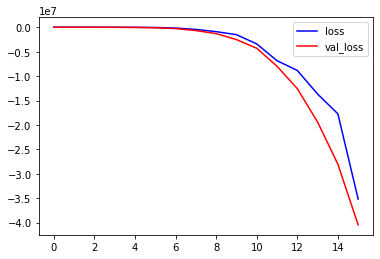

In [33]:
import matplotlib.pyplot as plt
plt.plot(log1["loss"],"b")
plt.plot(log1["val_loss"],"r")
plt.legend(["loss","val_loss"])


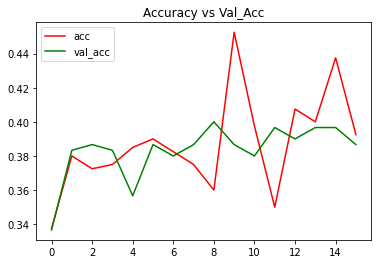

In [34]:
plt.plot(log1["accuracy"],"r")
plt.plot(log1["val_accuracy"],"g")
plt.title("Accuracy vs Val_Acc")
plt.legend(["acc","val_acc"])

Prediction

In [35]:
trained_model="/content/bestmodel.h5"
from keras.models import load_model

In [36]:
model=load_model(trained_model)

In [37]:
# model.evalute_generator : it is same as model.predict_generator but it give some analysis comparable info.
test_p="/content/Potato/Test"
test_data=augment_train(test_p)
pred=model.evaluate_generator(test_data) # loss ,accuracy


Found 300 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  after removing the cwd from sys.path.


In [38]:
[loss,accur]=pred
print("loss of test data is -",loss, "accuracy of input data is:-",accur)  

loss of test data is - -1236511.5 accuracy of input data is:- 0.4399999976158142


Images

In [42]:
p11="/content/Potato/Test/Potato___Early_blight/034959c1-f1e8-4a79-a6d5-3c1d14efa2f3___RS_Early.B 7136.JPG"


In [68]:
# m-1
import PIL as lab
img_array=np.array(lab.Image.open(p11).resize((224,224)))
img_array.shape  # un normalized data (x/255)

array([[[186, 185, 199],
        [194, 193, 207],
        [196, 195, 209],
        ...,
        [160, 159, 177],
        [144, 143, 161],
        [133, 132, 150]],

       [[190, 189, 203],
        [202, 201, 215],
        [204, 203, 217],
        ...,
        [157, 156, 174],
        [146, 145, 163],
        [147, 146, 164]],

       [[195, 194, 208],
        [196, 195, 209],
        [193, 192, 206],
        ...,
        [153, 152, 170],
        [145, 144, 162],
        [144, 143, 161]],

       ...,

       [[165, 163, 177],
        [164, 162, 176],
        [162, 160, 174],
        ...,
        [117, 113, 127],
        [138, 134, 148],
        [139, 135, 149]],

       [[162, 160, 174],
        [164, 162, 176],
        [164, 162, 176],
        ...,
        [132, 128, 142],
        [136, 132, 146],
        [133, 129, 143]],

       [[171, 169, 183],
        [171, 169, 183],
        [172, 170, 184],
        ...,
        [139, 135, 149],
        [131, 127, 141],
        [150, 146, 160]]

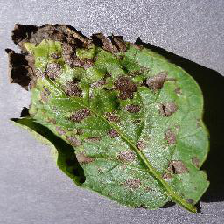

In [70]:
# m-2
from tensorflow.keras.preprocessing.image import load_img, img_to_array
img=load_img(p11,target_size=(224,224))
img_array=img_to_array(img)/255  # normalized data
img


In [71]:
img_array # normalized /255

array([[[0.72156864, 0.7176471 , 0.77254903],
        [0.7490196 , 0.74509805, 0.8       ],
        [0.7647059 , 0.7607843 , 0.8156863 ],
        ...,
        [0.627451  , 0.62352943, 0.69411767],
        [0.54509807, 0.5411765 , 0.6117647 ],
        [0.5176471 , 0.5137255 , 0.58431375]],

       [[0.75686276, 0.7529412 , 0.80784315],
        [0.8039216 , 0.8       , 0.85490197],
        [0.8235294 , 0.81960785, 0.8745098 ],
        ...,
        [0.61960787, 0.6156863 , 0.6862745 ],
        [0.56078434, 0.5568628 , 0.627451  ],
        [0.57254905, 0.5686275 , 0.6392157 ]],

       [[0.70980394, 0.7058824 , 0.7607843 ],
        [0.7372549 , 0.73333335, 0.7882353 ],
        [0.7490196 , 0.74509805, 0.8       ],
        ...,
        [0.60784316, 0.6039216 , 0.6745098 ],
        [0.56078434, 0.5568628 , 0.627451  ],
        [0.58431375, 0.5803922 , 0.6509804 ]],

       ...,

       [[0.63529414, 0.627451  , 0.68235296],
        [0.6392157 , 0.6313726 , 0.6862745 ],
        [0.63529414, 0

testing our img: img_array

In [73]:
# input shape of image must be in batch order (n_images_no, 224,224,3)
final_array=np.expand_dims(img_array,axis=0)
final_array.shape    # batch shape img( None, 224,224,3)

(1, 224, 224, 3)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


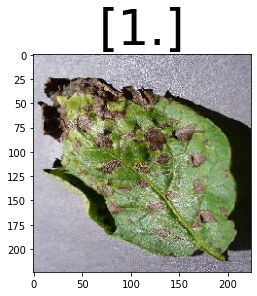

In [89]:
result=model.predict(final_array);
plt.imshow(img);
plt.title(result[0],fontsize=50);

In [78]:
# no of categories:
info("/content/Potato/Valid")

100  and samp type is - Potato___Early_blight *** Valid
100  and samp type is - Potato___Late_blight *** Valid
100  and samp type is - Potato___healthy *** Valid


Testing more images

In [95]:
# framing a function to predict
def final_predict(path):
  img=load_img(path,target_size=(224,224))
  img_arr=img_to_array(img)
  fin=np.expand_dims(img_arr,axis=0)
  out=model.predict(fin)
  plt.imshow(img)
  plt.title(out[0])
  pass

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


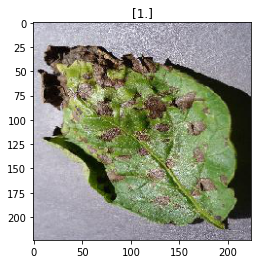

In [96]:
final_predict(p11)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


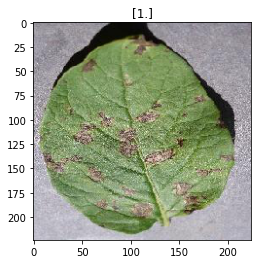

In [97]:
path="/content/Potato/Test/Potato___Early_blight/12826416-efc5-49d3-b615-731629c95435___RS_Early.B 7215.JPG"
final_predict(path)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


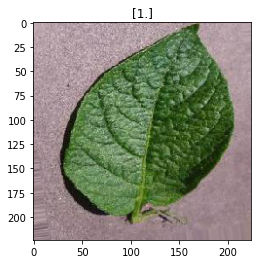

In [98]:
path="/content/Potato/Test/Potato___healthy/Potato_healthy-27-_0_9917.jpg"
final_predict(path)

In [ ]:
# model accuracy is poor. I have to improve its performance.